# Lab4: Hierarchical Clustering + Density Based Clustering

## Overview
In this lab you will learn about using Hierarchical Clustering methods like Agglomerative clustering and various linkage methods like Ward, Centroid etc. We will also later utilize the DBScan algorithm to identify clusters


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)

print("Shape:", X.shape)
df.head()


Shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


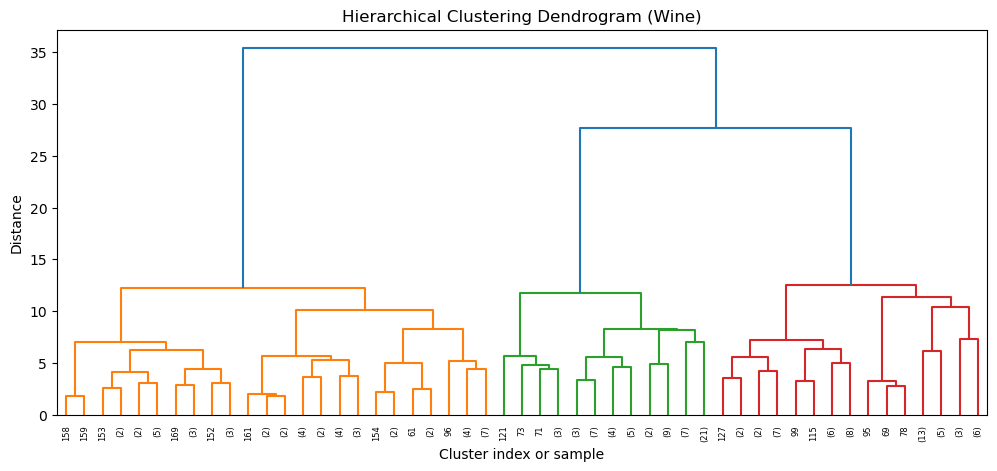

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Using Ward's method (minimizes variance within clusters)
Z = linkage(X_scaled, method="ward")


plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)  # truncate for readability
plt.title("Hierarchical Clustering Dendrogram (Wine)")
plt.xlabel("Cluster index or sample")
plt.ylabel("Distance")
plt.show()


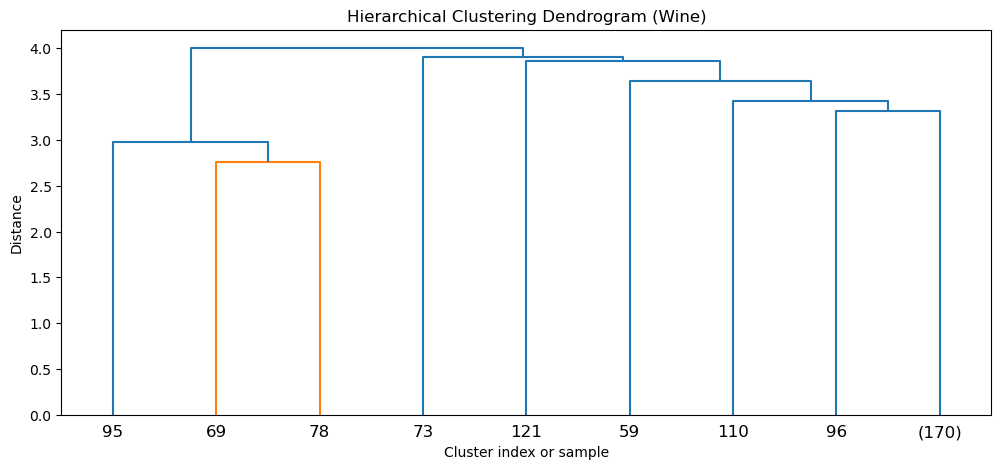

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# -------------------------
# TODO Use Single method for the linkage method from scipy (part 1) (2 points)
# ------------------------
Z = linkage(X_scaled, method = "single")

# ----------------------------
# Implementation ends here
# ----------------------------

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)  # truncate for readability
plt.title("Hierarchical Clustering Dendrogram (Wine)")
plt.xlabel("Cluster index or sample")
plt.ylabel("Distance")
plt.show()


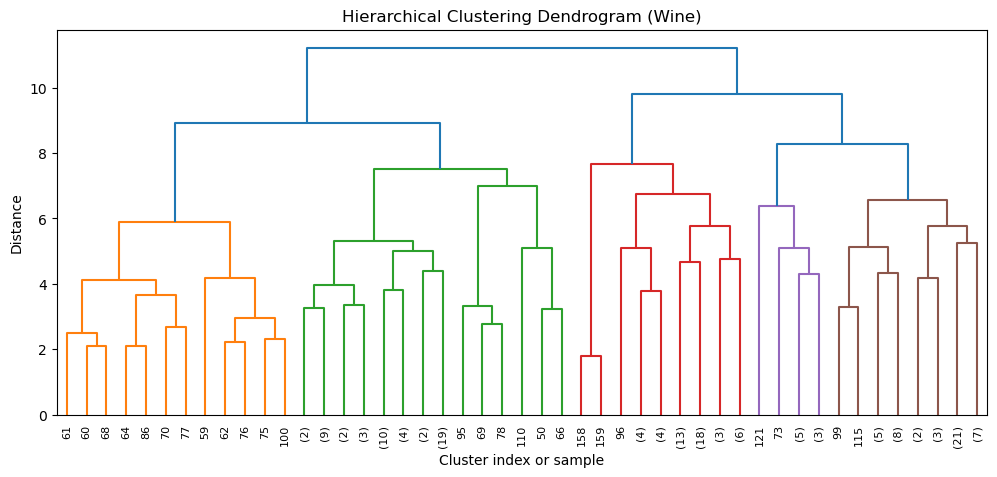

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


# -------------------------
# TODO Use Complete method for the linkage method from scipy (part 2) (2 points)
# ------------------------
Z = linkage(X_scaled, method = "complete")

# ----------------------------
# Implementation ends here
# ----------------------------

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)  # truncate for readability
plt.title("Hierarchical Clustering Dendrogram (Wine)")
plt.xlabel("Cluster index or sample")
plt.ylabel("Distance")
plt.show()


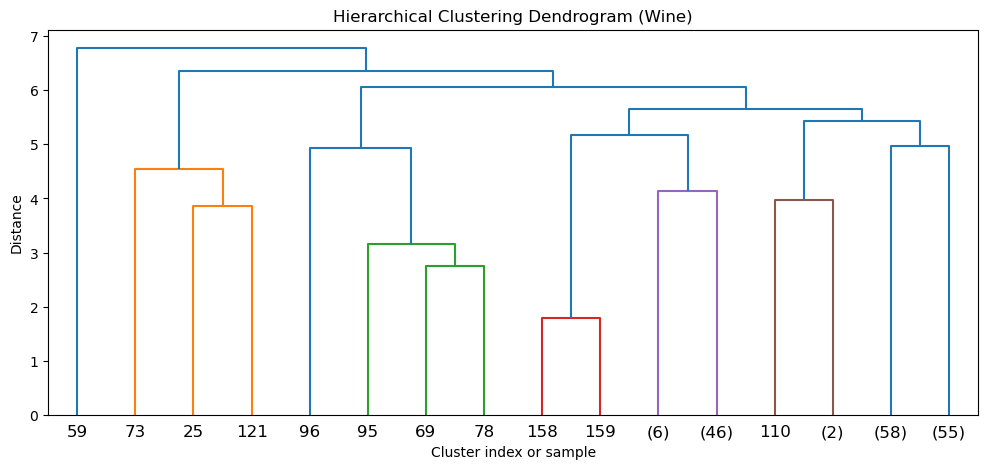

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# -------------------------
# TODO Use Average method for the linkage method from scipy (part 3) (2 points)
# ------------------------
Z = linkage(X_scaled, method = "average")

# ----------------------------
# Implementation ends here
# ----------------------------

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)  # truncate for readability
plt.title("Hierarchical Clustering Dendrogram (Wine)")
plt.xlabel("Cluster index or sample")
plt.ylabel("Distance")
plt.show()


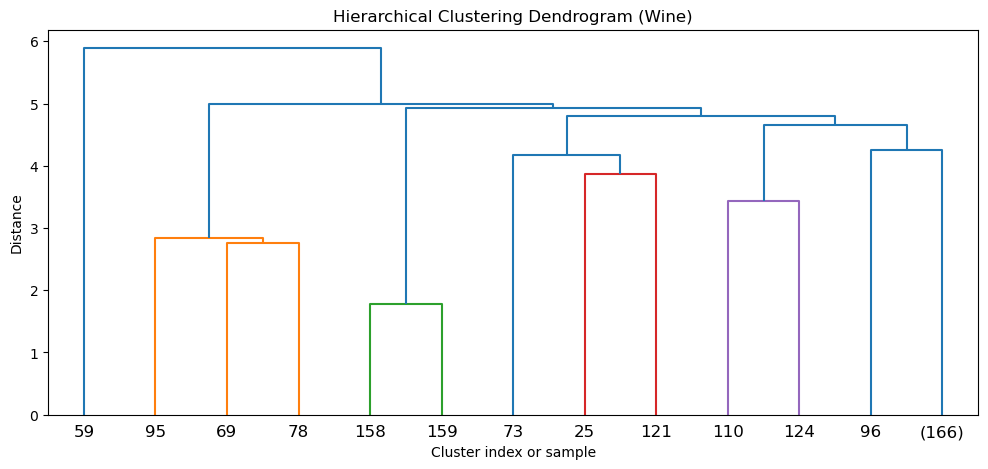

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# -------------------------
# TODO Use Centroid method for the linkage method from scipy (part 4) (2 points)
# ------------------------
Z = linkage(X_scaled, method = "centroid")

# ----------------------------
# Implementation ends here
# ----------------------------

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode="level", p=5)  # truncate for readability
plt.title("Hierarchical Clustering Dendrogram (Wine)")
plt.xlabel("Cluster index or sample")
plt.ylabel("Distance")
plt.show()


In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [10]:
# -----------------------------
# Load and standardize data
# -----------------------------
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# ---------------------------------------------
# TODO Agglomerative Clustering with Ward linkage with euclidean metric  (part 5) (2 points)
# ---------------------------------------------

agg = AgglomerativeClustering(n_clusters = 3, linkage = "ward", metric = "euclidean")
cluster_labels = agg.fit_predict(X_scaled)

# ----------------------------
# Implementation ends here
# ----------------------------

# -------------------------------------------------
# PCA to 2D (for visualization of any high-D X)
# -------------------------------------------------
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# Put in a DataFrame for convenience
df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Cluster": cluster_labels,
    "Class": y
})

# ---------------------------------------------
# Evaluate clustering quality (optional)
# ---------------------------------------------
ari = adjusted_rand_score(y, cluster_labels)
sil = silhouette_score(X_scaled, cluster_labels, metric="euclidean")
print(f"Adjusted Rand Index (vs true classes): {ari:.3f}")
print(f"Silhouette Score (on standardized features): {sil:.3f}")

# ---------------------------------------------
# Visualize clusters in PCA space
# ---------------------------------------------
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["PC1"], df["PC2"], c=df["Cluster"], alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering on Wine (PCA projection) — Cluster Labels")
# Build a legend mapping cluster IDs to colors
handles, _ = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in range(3)], title="Clusters")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Visualize TRUE classes in the same PCA space
# ---------------------------------------------
plt.figure(figsize=(8, 6))
scatter_true = plt.scatter(df["PC1"], df["PC2"], c=df["Class"], alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Wine True Classes (PCA projection)")
handles_true, _ = scatter_true.legend_elements()
plt.legend(handles_true, [name.title() for name in target_names], title="True Class")
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

Adjusted Rand Index (vs true classes): -0.005
Silhouette Score (on standardized features): 0.222


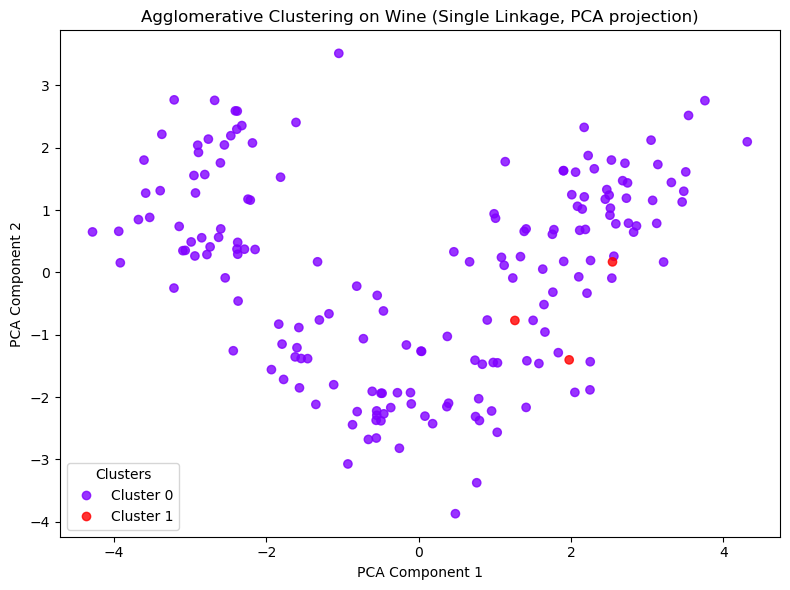

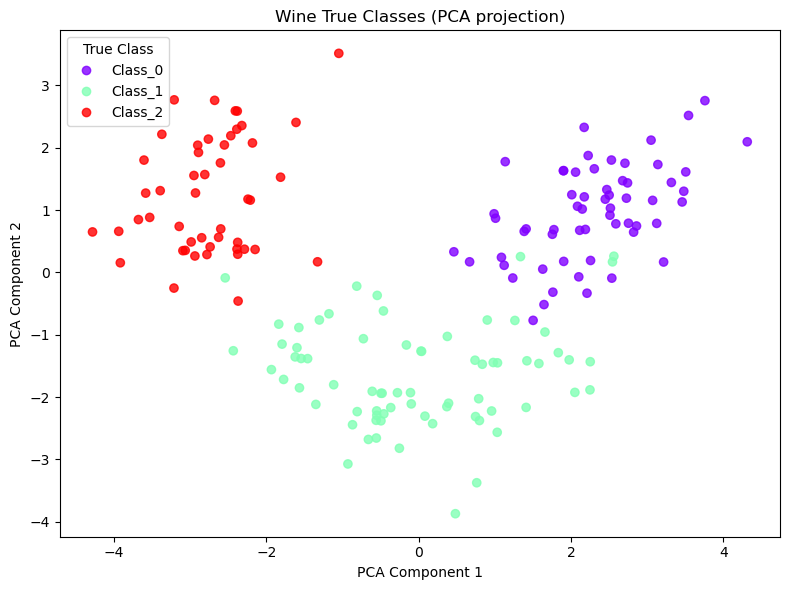

In [12]:
# ---------------------------------------------
# TODO Agglomerative Clustering with SINGLE linkage with euclidean metric (part 6) (2 points)
# ---------------------------------------------
agg = AgglomerativeClustering(linkage = "single", metric = "euclidean")
cluster_labels = agg.fit_predict(X_scaled)

# ----------------------------
# Implementation ends here
# ----------------------------

# -------------------------------------------------
# PCA to 2D (for visualization of high-D X)
# -------------------------------------------------
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Cluster": cluster_labels,
    "Class": y
})

# ---------------------------------------------
# Evaluate clustering quality (optional)
# ---------------------------------------------
ari = adjusted_rand_score(y, cluster_labels)
sil = silhouette_score(X_scaled, cluster_labels, metric="euclidean")
print(f"Adjusted Rand Index (vs true classes): {ari:.3f}")
print(f"Silhouette Score (on standardized features): {sil:.3f}")

# ---------------------------------------------
# Visualize clusters in PCA space
# ---------------------------------------------
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["PC1"], df["PC2"], c=df["Cluster"], alpha=0.8, cmap="rainbow")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering on Wine (Single Linkage, PCA projection)")
handles, _ = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in range(3)], title="Clusters")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Visualize TRUE classes in the same PCA space
# ---------------------------------------------
plt.figure(figsize=(8, 6))
scatter_true = plt.scatter(df["PC1"], df["PC2"], c=df["Class"], alpha=0.8, cmap="rainbow")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Wine True Classes (PCA projection)")
handles_true, _ = scatter_true.legend_elements()
plt.legend(handles_true, [name.title() for name in target_names], title="True Class")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Try with k=3 (since wine has 3 classes)
model = AgglomerativeClustering(n_clusters=3, linkage="single")
labels = model.fit_predict(X_scaled)

print("Cluster labels:", labels[:20])


Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
import numpy as np
np.unique(labels)

array([0, 1, 2])

In [16]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score


# ---------------------------------------------
# TODO Make a list of the various linkage methods namely single, complete, average and ward (part 7) (2 points)
# ---------------------------------------------
linkages = ["single", "complete", "average", "ward"]

# ----------------------------
# Implementation ends here
# ----------------------------

for link in linkages:
    # ---------------------------------------------
    # TODO Call AgglomerativeClustering and set the number of clusters to be 3 with the corresponding linkage and set the metric to be euclidean (part 8) (2 points)
    # ---------------------------------------------
    model = AgglomerativeClustering(n_clusters = 3, linkage = link, metric = "euclidean")

    # ----------------------------
    # Implementation ends here
    # ----------------------------

    labels = model.fit_predict(X_scaled)
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    sil = silhouette_score(X_scaled, labels)
    print(f"{link:8s} | Silhouette={sil:.3f} | ARI={ari:.3f} | NMI={nmi:.3f}")


single   | Silhouette=0.183 | ARI=-0.007 | NMI=0.035
complete | Silhouette=0.204 | ARI=0.577 | NMI=0.614
average  | Silhouette=0.158 | ARI=-0.005 | NMI=0.018
ward     | Silhouette=0.277 | ARI=0.790 | NMI=0.786


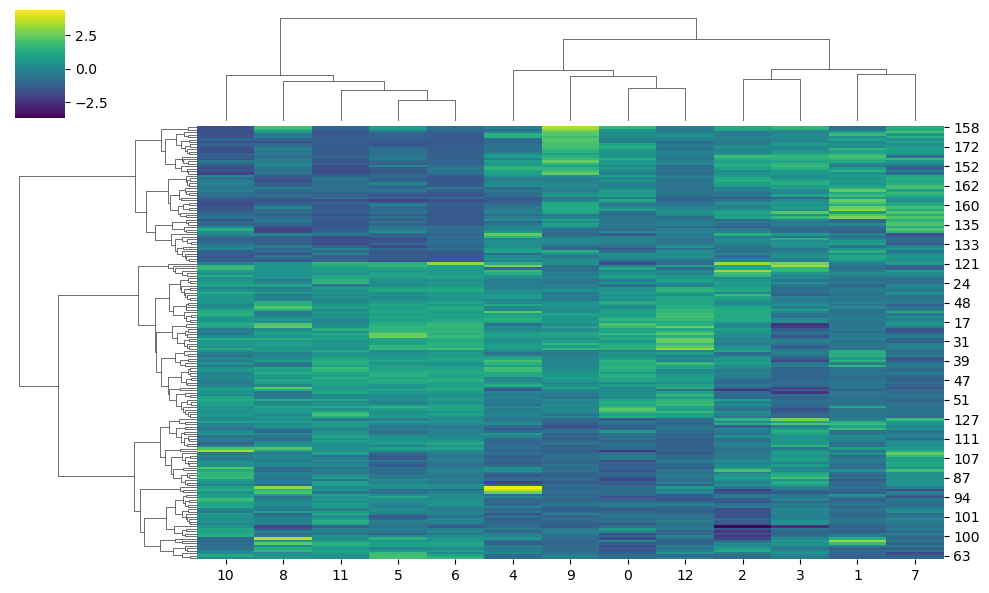

In [17]:
import seaborn as sns


# ---------------------------------------------
# TODO Use the clustermap from Seaboarn and use the X_scaled data, and set the method to be "ward", cmap to be "viridis" and figsize=(10,6) (part 9) (2 points)
# ---------------------------------------------
sns.clustermap(X_scaled, method = "ward", cmap = "viridis", figsize = (10, 6))

# ----------------------------
# Implementation ends here
# ----------------------------

plt.show()


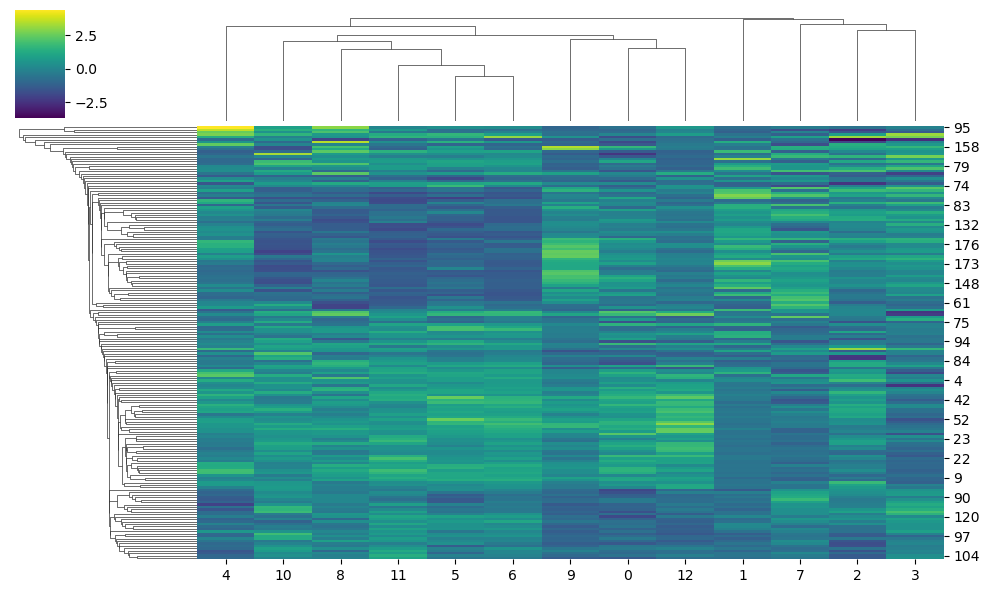

In [18]:

# ---------------------------------------------
# TODO Use the clustermap from Seaboarn and use the X_scaled data, and set the method to be "single", cmap to be "viridis" and figsize=(10,6) (part 10) (2 points)
# ---------------------------------------------
sns.clustermap(X_scaled, method = "single", cmap = "viridis", figsize = (10, 6))

# ----------------------------
# Implementation ends here
# ----------------------------

plt.show()

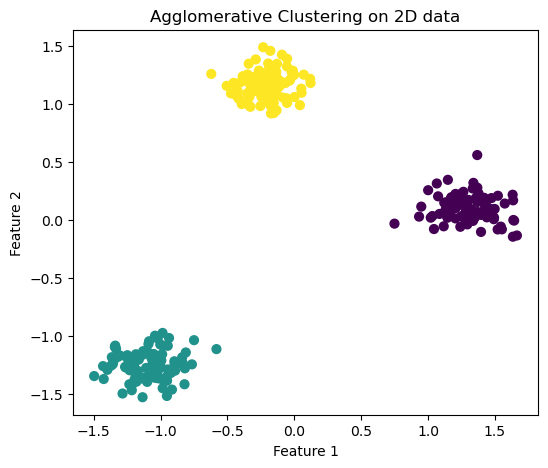

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic 2D data (3 blobs)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Scale for better distance-based clustering
X_scaled = StandardScaler().fit_transform(X)


# ---------------------------------------------
# TODO Run Agglomerative Clustering (Ward linkage, Euclidean distance) and then fit_predict on the X_scaled data (part 11) (2 points)
# ---------------------------------------------
agg = AgglomerativeClustering(n_clusters = 3, linkage = "ward", metric = "euclidean")
labels = agg.fit_predict(X_scaled)

# ----------------------------
# Implementation ends here
# ----------------------------

# Visualize the cluster labels
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis", s=40)
plt.title("Agglomerative Clustering on 2D data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


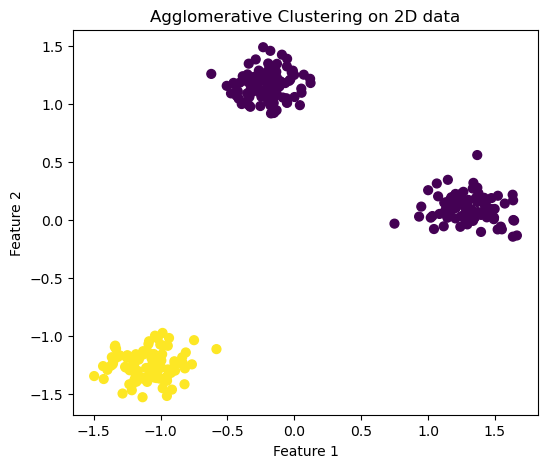

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic 2D data (3 blobs)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Scale for better distance-based clustering
X_scaled = StandardScaler().fit_transform(X)


# ---------------------------------------------
# TODO Run Agglomerative Clustering (Single linkage, Euclidean distance) and then fit_predict on the X_scaled data (part 12) (2 points)
# ---------------------------------------------
agg = AgglomerativeClustering(linkage = "single", metric = "euclidean")
labels = agg.fit_predict(X_scaled)

# ----------------------------
# Implementation ends here
# ----------------------------


# Visualize the cluster labels
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis", s=40)
plt.title("Agglomerative Clustering on 2D data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


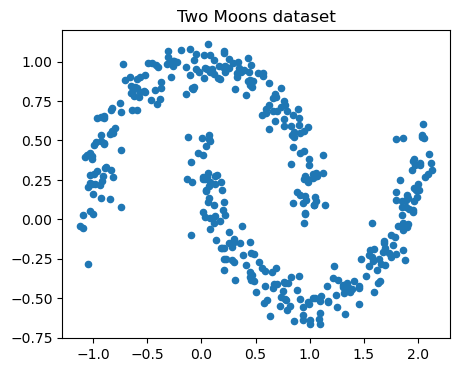

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 2 moons with some noise
X, y_true = make_moons(n_samples=400, noise=0.08, random_state=42)

plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], s=20)
plt.title("Two Moons dataset")
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)


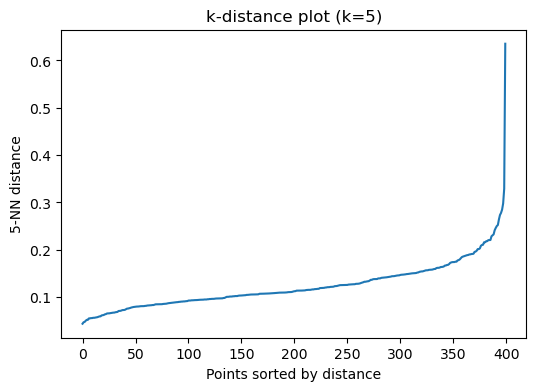

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

#Look for the “elbow” or point of maximum curvature in the plot.
#That elbow indicates a good choice of ε:
#Below it: points within dense clusters (small distances).
#Above it: noise/outliers (large distances).

def k_distance_plot(X, k=5):
    nn = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nn.kneighbors(X)
    kth = np.sort(distances[:, -1])
    plt.figure(figsize=(6,4))
    plt.plot(kth)
    plt.title(f"k-distance plot (k={k})")
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{k}-NN distance")
    plt.show()

k_distance_plot(X_scaled, k=5)


In [29]:
from sklearn.cluster import DBSCAN


# ---------------------------------------------
# TODO (part 13) (2 points)
# ---------------------------------------------
eps = 0.25       # pick from k-distance elbow
min_samples = 5 # common default

#Use DBSCAN with the eps and min_samples you defined above
db = DBSCAN(eps = eps, min_samples = min_samples)

#Run fit_predict on the X_scaled data
labels = db.fit_predict(X_scaled)

# ----------------------------
# Implementation ends here
# ----------------------------

print("Unique labels:", set(labels))  # -1 means noise


Unique labels: {0, 1, -1}


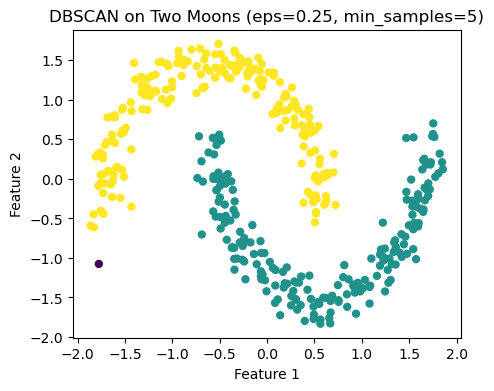

In [30]:
plt.figure(figsize=(5,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis", s=25)
plt.title(f"DBSCAN on Two Moons (eps={eps}, min_samples={min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# [TODO] Answer the following questions (6 points)

---

**1. Question:** What do the parameters ε (epsilon) and min_samples mean in DBSCAN?

**Answer:**  

Epsilon is the maximum distance allowed between any two points in the same group. Min samples is the minimum number of points that are necessary for a point's group for the point to be a core point. Together a dense cluster has a core point with at least min_samples other points in the group within distance epsilon.

---

**2. Question:** Why did we use the value of 3 for the number of cluster centers in AgglomerativeClustering for the Wine dataset

**Answer:**

There are 3 classes of wines in the dataset, so this number was used for clustering.

---

**3. Question:** Why was the clustering for the single linkage method much worse compared to the ward linkage

**Answer:**

The distance in single linkage is determined by the shortest distance between any pair of points between groups. Ward linkage determines clusters by minimizing the added variance within each cluster when a point is added. The second method makes better clusters because they are more compact and better separated. 